<a href="https://colab.research.google.com/github/ItsYoussefElshemy/selected-project/blob/main/cnn_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
replace Arabic Handwritten Characters/Test Images 3360x32x32/╪г/id_1009_label_1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [103]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [104]:
img_dim = 32
CLASSES = sorted(["أ","ب","ت","ث","ج","ح","خ","د","ذ","ر","ز","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ك","ل","م","ن","ه","و","ي"])
train_gen = ImageDataGenerator().flow_from_directory('/content/Arabic Handwritten Characters/Train Images 13440x32x32',target_size=(img_dim, img_dim))
val_gen = ImageDataGenerator().flow_from_directory('/content/Arabic Handwritten Characters/Test Images 3360x32x32',target_size=(img_dim, img_dim))
test_gen = ImageDataGenerator().flow_from_directory('/content/Arabic Handwritten Characters/Test Images 3360x32x32',target_size=(img_dim, img_dim))

Found 13440 images belonging to 28 classes.
Found 3360 images belonging to 28 classes.
Found 3360 images belonging to 28 classes.


In [105]:
import tensorflow as tf
from  keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, GlobalAvgPool2D, Dense, Flatten , Dropout , InputLayer, BatchNormalization
from keras.optimizers import Adam

#VGG16 

model = Sequential()

model.add(Conv2D(input_shape=(img_dim,img_dim,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name='last_conv'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=28, activation="softmax"))
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

MODEL_PATH = 'saved-models/cnn'

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 128)      

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [106]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(MODEL_PATH,
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=[checkpoint],
)

Epoch 1/50
419/420 [============================>.] - ETA: 0s - loss: 2.6928 - accuracy: 0.1357
Epoch 1: val_loss improved from inf to 4.24538, saving model to saved-models/cnn
420/420 [==============================] - 20s 42ms/step - loss: 2.6911 - accuracy: 0.1363 - val_loss: 4.2454 - val_accuracy: 0.0780
Epoch 2/50
419/420 [============================>.] - ETA: 0s - loss: 2.0575 - accuracy: 0.2653
Epoch 2: val_loss improved from 4.24538 to 3.20622, saving model to saved-models/cnn
420/420 [==============================] - 18s 42ms/step - loss: 2.0568 - accuracy: 0.2656 - val_loss: 3.2062 - val_accuracy: 0.1988
Epoch 3/50
419/420 [============================>.] - ETA: 0s - loss: 1.8734 - accuracy: 0.3287
Epoch 3: val_loss did not improve from 3.20622
420/420 [==============================] - 17s 41ms/step - loss: 1.8727 - accuracy: 0.3288 - val_loss: 3.4232 - val_accuracy: 0.1732
Epoch 4/50
420/420 [==============================] - ETA: 0s - loss: 1.3929 - accuracy: 0.4978
Epoc

In [107]:
print(MODEL_PATH)
model.load_weights(MODEL_PATH)
model.evaluate(test_gen)

saved-models/cnn
105/105 [==============================] - 2s 17ms/step - loss: 0.2419 - accuracy: 0.9470


[0.24190787971019745, 0.9470238089561462]

In [108]:
from tensorflow import keras
model.save('ModelCnn')
model = keras.models.load_model('ModelCnn')
model.evaluate(test_gen)

105/105 [==============================] - 2s 17ms/step - loss: 0.2419 - accuracy: 0.9470


[0.2419080138206482, 0.9470238089561462]

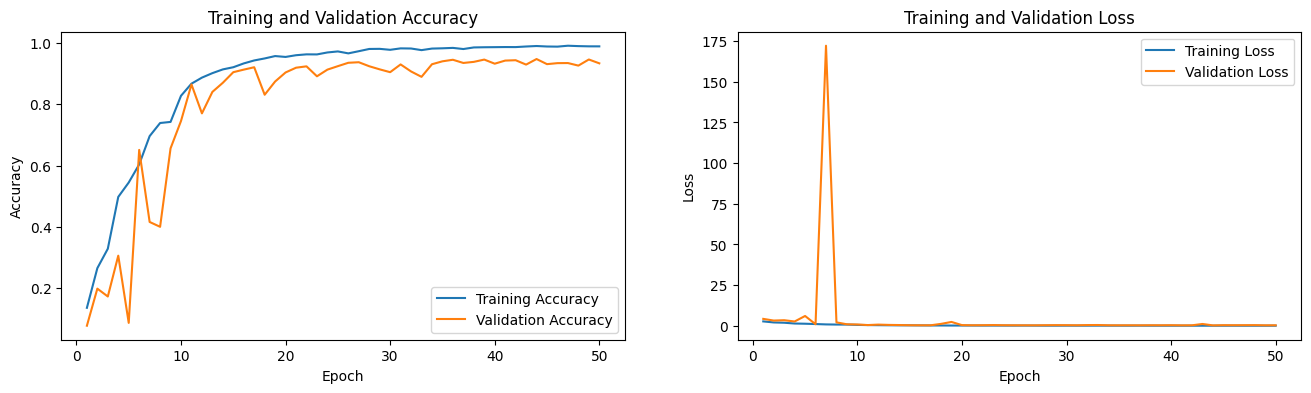

In [109]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [110]:
def grad_cam_heatmap(image, last_conv_layer_name='last_conv'):
    
    if model.layers[0].__class__.__name__ == 'Functional':
        last_conv_layer_idx = 0
        last_conv_layer_model = model.layers[0]
    else:
        last_conv_layer = model.get_layer(last_conv_layer_name)
        last_conv_layer_idx = model.layers.index(last_conv_layer)
        last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)


    classifier_input = tf.keras.Input(shape=last_conv_layer_model.output.shape[1:])
    x = classifier_input
    classifier_layers = model.layers[last_conv_layer_idx+1:]
    for layer in classifier_layers:
        x = layer(x)
    classifier_model = tf.keras.Model(classifier_input, x)


    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(image)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]
        print(CLASSES[top_pred_index])

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)


    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap

In [111]:
import matplotlib.cm as cm

def grad_cam(img, last_conv_layer_name='last_conv'):
    colors = cm.jet(np.arange(256))[:, :3]
    gc_mask = grad_cam_heatmap(np.expand_dims(img, 0), last_conv_layer_name)
    gc_mask_uint8 = (gc_mask*255.0).astype('uint8')
    heatmap = colors[gc_mask_uint8]
    heatmap = cv2.resize(heatmap, (img_dim, img_dim))
    heatmap = (heatmap*255).astype('uint8')
    img_uint8 = img.astype('uint8')
    img_overlay = cv2.addWeighted(src1=img_uint8, alpha=0.6, src2=heatmap, beta=0.4, gamma=0.0)
    plt.imshow(img_overlay)
    plt.show()

ج


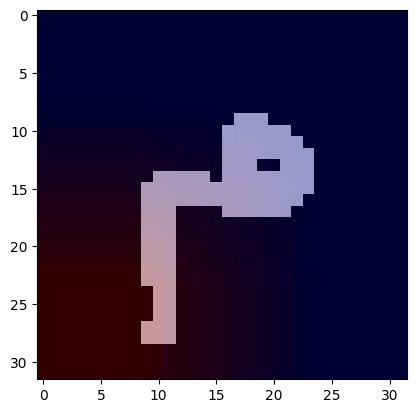

In [113]:
img = val_gen[3][0][8]
grad_cam(img)